## Modelling Notebook

This notebook is to be used for testing out the various models that you want to use. No preprocessing will be done in this notebook. Steps:

1. Read in `data/final_data.csv` that you created in the `Data Cleaning.ipynb`
2. Try various models and print appropriate metrics (accuracy/MSE etc)
3. Pick a final model and save it as `models/model.pkl`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv("../input/train_data.csv",index_col=0)
validation=pd.read_csv("../input/validation_data.csv",index_col=0)
final_test=pd.read_csv("../input/test_data.csv",index_col=0)

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [4]:
columns=["Clearsky DHI","Clearsky DNI","Clearsky GHI"]
target=["Clearsky DHI","Clearsky DNI","Clearsky GHI"]

In [5]:
def evaluate(y_true,predictions):
    # Performance Metrics
    print("MSE: ", mean_squared_error(y_true,predictions))
    print("MAE: ", mean_absolute_error(y_true,predictions))
    print("R2: ", r2_score(y_true,predictions))


def train_and_evaluate(model):
    """
    model: Sklearn model instance
    """
    #Training
    X_train=train.drop(columns=columns)
    y_train=train[target]
    model.fit(X_train,y_train)

    # Validation
    X_val=validation.drop(columns=columns)
    y_val=validation[["Clearsky DHI","Clearsky DNI","Clearsky GHI"]]
    predictions=model.predict(X_val)

    evaluate(y_val,predictions)

def make_submission(model,name):
    target=["Clearsky DHI","Clearsky DNI","Clearsky GHI"]
    X_test=final_test.drop(columns=columns)
    submission=model.predict(X_test)
    submission_df=pd.DataFrame(submission,columns=target)
    submission_df.to_csv(f"../output/{name}_submission.csv",index=False)
    return submission_df

As we observed earlier, the target has a high number of 0 values. Therefore, it would be a good idea to give every prediction as 0 and check out the error.

In [6]:
zeros=np.zeros_like(validation[["Clearsky DHI","Clearsky DNI","Clearsky GHI"]])
evaluate(validation[["Clearsky DHI","Clearsky DNI","Clearsky GHI"]],zeros)

MSE:  142230.846712608
MAE:  212.12523579165145
R2:  -0.7010882923702167


So despite the overwhelming number of 0s, predicting every number as zero does not seem to give apt results.

In [7]:
lr=LinearRegression()
train_and_evaluate(lr)

MSE:  16216.617746964781
MAE:  94.55370071203265
R2:  0.7902240553511589


In [8]:
df=make_submission(lr,"Linear_Regression")

In [9]:
df

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,32.249367,160.519083,124.147512
1,23.592278,108.751498,78.848160
2,14.808085,56.223867,32.883727
3,5.939158,3.189539,-13.524092
4,-2.775102,-54.556086,-61.608000
...,...,...,...
17515,65.808666,513.373336,366.856830
17516,58.507336,469.712910,328.651666
17517,51.050658,425.123539,289.633627
17518,42.534793,374.200450,245.073253


In [10]:
rf=RandomForestRegressor()
train_and_evaluate(rf)

MSE:  1078.3916631959894
MAE:  14.784712764115568
R2:  0.9552035369369095


Random Forests seem to be performing quite well even without any tuning. Perhaps tree based models would work better on the dataset.

In [11]:
make_submission(rf,"Random_Forest")

,Clearsky DHI,Clearsky DNI,Clearsky GHI
0,0.00,0.00,0.00
1,0.00,0.00,0.00
2,0.00,0.00,0.00
3,0.00,0.00,0.00
4,0.00,0.00,0.00
...,...,...,...
17515,57.14,571.44,177.21
17516,40.09,377.26,85.58
17517,13.29,186.50,18.73
17518,0.00,0.00,0.00


<BarContainer object of 2 artists>

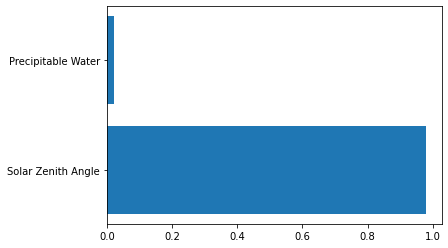

In [12]:
plt.barh(train.drop(columns=columns).columns, rf.feature_importances_)